In [4]:
import numpy as np
import matplotlib.pyplot as plt

file = open("../tiff_vsi/vsi dummy/_Process_9747_/stack1/frame_t_0.ets", "rb") 
print(file.read(4).decode())
print("headerSize", int.from_bytes(file.read(4), "little"))
print("version", int.from_bytes(file.read(4), "little"))
ndimensions = int.from_bytes(file.read(4), "little")
print("ndimensions", ndimensions)
additionalHeaderOffset = int.from_bytes(file.read(8), "little")
print("additionalHeaderOffset", additionalHeaderOffset)
print("addtionalHeaderSize", int.from_bytes(file.read(4), "little"))
print("skip", int.from_bytes(file.read(4), "little"))

print("tell", file.tell())
usedChunkOffset = int.from_bytes(file.read(8), "little")
print("usedChunkOffset", usedChunkOffset)
nUsedChunks = int.from_bytes(file.read(4), "little")
print("nUsedChunks", nUsedChunks)

file.seek(additionalHeaderOffset)
print("ETS", file.read(4).decode())
file.read(4)
pixelType = int.from_bytes(file.read(4), "little")
print("pixelType", pixelType)
sizeC = int.from_bytes(file.read(4), "little")
print("sizeC", sizeC)
file.read(4)
print("compression", int.from_bytes(file.read(4), "little"))
print("comp quality", int.from_bytes(file.read(4), "little"))
sizeX = int.from_bytes(file.read(4), "little")
sizeY = int.from_bytes(file.read(4), "little")
print("sizeX", sizeX)
print("sizeY", sizeY)
file.seek(usedChunkOffset)
offsets = []
coords = []
for i in range(nUsedChunks):
    file.read(4)
    coords.append([int.from_bytes(file.read(4), "little") for i in range(ndimensions)])
    offsets.append(int.from_bytes(file.read(8), "little"))
    file.read(8)
coords
pass

SIS 
headerSize 64
version 3
ndimensions 6
additionalHeaderOffset 64
addtionalHeaderSize 228
skip 0
tell 32
usedChunkOffset 1486280292
nUsedChunks 4000
ETS ETS 
pixelType 4
sizeC 1
compression 0
comp quality 100
sizeX 509
sizeY 365


In [25]:
offsets[2000]

371862

In [21]:
coords[3999]

[0, 0, 1999, 0, 1, 0]

In [22]:
offsets[0]

292

In [1]:
b"SIS\x00"

b'SIS\x00'

In [3]:
[ord(c) for c in "SIS\x00"]

[83, 73, 83, 0]

In [4]:
coords[0]

[0, 0, 0, 0, 0, 0]

In [75]:
it = iter(range(1000))

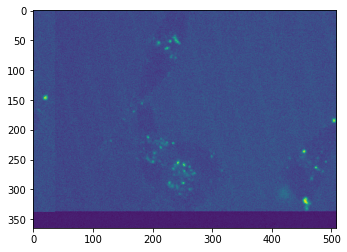

In [154]:
file.seek(offsets[next(it)]+400000)
size = sizeX*sizeY*2
img = np.frombuffer(file.read(size), dtype = "uint16").reshape(sizeY, sizeX)
plt.imshow(img)

In [169]:
offsets.index(292 + size)

2000

In [166]:
size*4000

1486280000

In [159]:
offsets

[292,
 743432,
 1486572,
 2229712,
 2972852,
 3715992,
 4459132,
 5202272,
 5945412,
 6688552,
 7431692,
 8174832,
 8917972,
 9661112,
 10404252,
 11147392,
 11890532,
 12633672,
 13376812,
 14119952,
 14863092,
 15606232,
 16349372,
 17092512,
 17835652,
 18578792,
 19321932,
 20065072,
 20808212,
 21551352,
 22294492,
 23037632,
 23780772,
 24523912,
 25267052,
 26010192,
 26753332,
 27496472,
 28239612,
 28982752,
 29725892,
 30469032,
 31212172,
 31955312,
 32698452,
 33441592,
 34184732,
 34927872,
 35671012,
 36414152,
 37157292,
 37900432,
 38643572,
 39386712,
 40129852,
 40872992,
 41616132,
 42359272,
 43102412,
 43845552,
 44588692,
 45331832,
 46074972,
 46818112,
 47561252,
 48304392,
 49047532,
 49790672,
 50533812,
 51276952,
 52020092,
 52763232,
 53506372,
 54249512,
 54992652,
 55735792,
 56478932,
 57222072,
 57965212,
 58708352,
 59451492,
 60194632,
 60937772,
 61680912,
 62424052,
 63167192,
 63910332,
 64653472,
 65396612,
 66139752,
 66882892,
 67626032,
 683691

In [170]:
offsets[1990:2010]

[1478848892,
 1479592032,
 1480335172,
 1481078312,
 1481821452,
 1482564592,
 1483307732,
 1484050872,
 1484794012,
 1485537152,
 371862,
 1115002,
 1858142,
 2601282,
 3344422,
 4087562,
 4830702,
 5573842,
 6316982,
 7060122]

In [158]:
400000+56478932

56878932

In [155]:
offsets

[292,
 743432,
 1486572,
 2229712,
 2972852,
 3715992,
 4459132,
 5202272,
 5945412,
 6688552,
 7431692,
 8174832,
 8917972,
 9661112,
 10404252,
 11147392,
 11890532,
 12633672,
 13376812,
 14119952,
 14863092,
 15606232,
 16349372,
 17092512,
 17835652,
 18578792,
 19321932,
 20065072,
 20808212,
 21551352,
 22294492,
 23037632,
 23780772,
 24523912,
 25267052,
 26010192,
 26753332,
 27496472,
 28239612,
 28982752,
 29725892,
 30469032,
 31212172,
 31955312,
 32698452,
 33441592,
 34184732,
 34927872,
 35671012,
 36414152,
 37157292,
 37900432,
 38643572,
 39386712,
 40129852,
 40872992,
 41616132,
 42359272,
 43102412,
 43845552,
 44588692,
 45331832,
 46074972,
 46818112,
 47561252,
 48304392,
 49047532,
 49790672,
 50533812,
 51276952,
 52020092,
 52763232,
 53506372,
 54249512,
 54992652,
 55735792,
 56478932,
 57222072,
 57965212,
 58708352,
 59451492,
 60194632,
 60937772,
 61680912,
 62424052,
 63167192,
 63910332,
 64653472,
 65396612,
 66139752,
 66882892,
 67626032,
 683691

In [134]:
img

array([[105, 102, 106, ..., 101,  99, 100],
       [107,  97, 104, ...,  98,  99, 105],
       [ 99,  92, 102, ..., 102, 100, 106],
       ...,
       [103, 103, 102, ..., 106, 103,  99],
       [105,  99, 102, ..., 103, 102, 102],
       [ 97, 100, 102, ..., 146, 137, 148]], dtype=uint16)